## Unsupervised Learning in Python

### NOTE: The following link shown in the first part of this course is wrong:
https://scikitlearn.org/stable/modules/generated/sklearn.datasets.load_iris.html

### This is the safe place to get the iris data set
https://archive.ics.uci.edu/dataset/53/iris

This notebook is about implementation in Python/sklearn. It assumes prior knowledge of the theory behind each analysis.

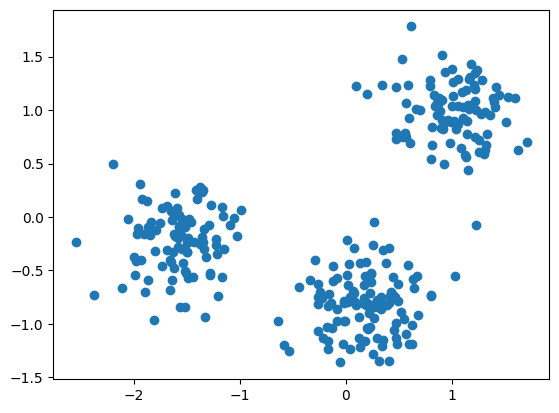

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

points = np.loadtxt('./data/points01.txt', delimiter=',')
xs = points[:, 0]
ys = points[:, 1]
plt.scatter(xs, ys)

In [2]:
new_points = np.loadtxt('./data/points02.txt', delimiter=',')

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 1 2 0 1 0 1 1 1 2 0 1 1 2 2 1 2 2 1 1 2 1 0 1 0 2 1 2 2 0 0 1 1 1 2 0 1
 1 0 1 2 0 0 2 0 1 2 2 1 1 1 1 2 2 0 0 2 2 2 0 0 1 1 1 0 1 2 1 0 2 0 0 0 1
 0 2 2 0 1 2 0 2 0 1 2 1 2 0 1 1 1 0 1 1 0 2 2 2 2 0 1 0 2 2 0 0 1 0 2 2 0
 2 2 2 1 1 1 1 2 2 1 0 1 2 1 0 2 1 2 2 1 2 1 2 0 1 0 0 1 2 0 1 0 0 2 1 1 0
 2 0 2 1 0 2 2 0 2 1 1 2 1 2 2 1 1 0 1 1 2 0 2 0 0 1 0 1 1 0 0 2 0 0 0 2 1
 1 0 2 0 2 2 1 1 1 0 1 1 1 2 2 0 1 0 0 0 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2
 1 1 0 2 0 0 2 0 2 0 2 1 1 2 1 1 1 2 0 0 2 1 1 2 1 2 2 1 2 2 0 2 0 0 0 1 2
 2 2 0 1 0 2 0 2 2 1 0 0 0 2 1 1 1 0 1 2 2 1 0 0 2 0 0 2 0 1 0 2 2 2 2 1 2
 2 1 1 0]


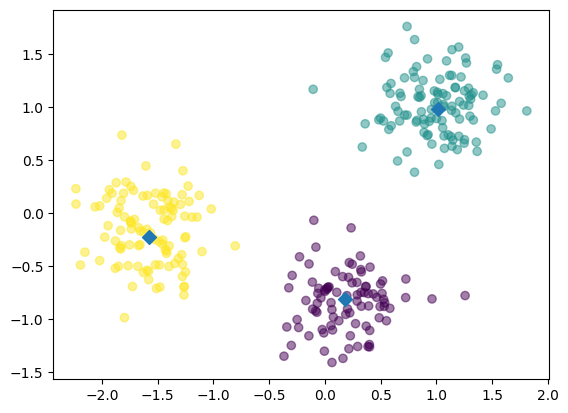

In [3]:
# Assign the columns of new_points: xs and ys
xs = new_points[:, 0]
ys = new_points[:, 1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

## How many clusters of grain?

A good number of clusters for a dataset using the k-means inertia graph is in the "elbow" of the cureve. Let's say that we are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

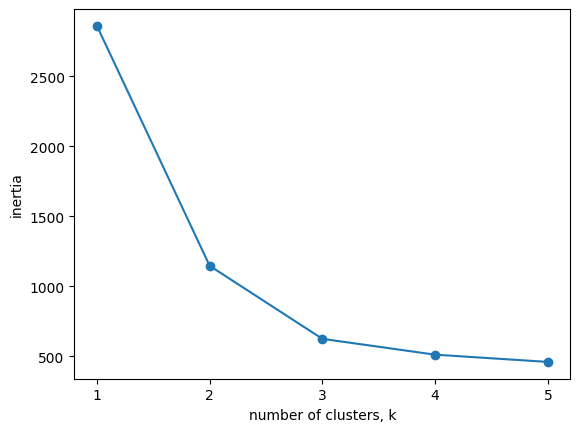

In [4]:
samples = np.loadtxt('./data/seeds.csv', delimiter=',')
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Evaluating the grain clustering

From the inertia plot above, 3 looks like a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". Let's look at clustering the grain samples into three clusters, and comparing those clusters to the grain varieties using a cross-tabulation.

In [5]:
varieties = pd.read_csv('./data/seed_varieties.txt', header=None, names=['variety'])
varieties = list(varieties['variety'])
print(len(varieties))

210


In [6]:
# KMeans model with 3 clusters
model = KMeans(n_clusters=3)

# fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)  # like running .fit() followed by .predict()

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  'Canadian wheat'  'Kama wheat'  'Rosa wheat'
labels                                                 
0                         0             1            60
1                        70             5             0
2                         0            64            10


## Piedmont wines dataset
 
+ 178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
+ Features measure chemical composition e.g. alcohol content
+ Visual properties like "color intensity"



In [7]:
wine_data = pd.read_csv('./data/wine.csv')
wine_data.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine_no_labels = wine_data.iloc[:, 2:]
wine_labels = wine_data.loc[:, ['class_name']]
wine_no_labels.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
model_wine = KMeans(n_clusters=3)
labels = model.fit_predict(wine_no_labels)
varieties = wine_labels['class_name'].values
df = pd.DataFrame({
    'labels': labels,
    'varieties': varieties
})

ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)  # poor separation

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20


## Feature variances

+ The wine features have very different variances
+ Can use `StandardScalar` to transform features to have mean = 0, and variance = 1 (standardize)
+ Feature standardization improves clustering



In [10]:
# use pipeline to combine multiple steps
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(wine_no_labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [11]:
labels_std = pipeline.predict(wine_no_labels)
ct_std = pd.crosstab(labels_std, df['varieties'])
print(ct_std)  # much better separation!

varieties  Barbera  Barolo  Grignolino
row_0                                 
0                0       0          65
1                0      59           3
2               48       0           3


## Scaling fish data for clustering

We are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, we'll need to standardize these features first. Here, we'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/jse_data_archive.htm).

In [12]:
fish_data = pd.read_csv('./data/fish.csv', header=None)
fish_data.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [13]:
fish_samples = fish_data.iloc[:, 1:].values  # (85, 6)
fish_species = fish_data.iloc[:, 0]

In [14]:
# Create scaler
scaler = StandardScaler()

# Create KMeans instance
kmeans = KMeans(n_clusters=4)

# Create pipeline
pipeline = make_pipeline(scaler, kmeans)

In [15]:
# Fit the pipeline to samples
pipeline.fit(fish_samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(fish_samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({
    'labels': labels,
    'species': fish_species
})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1            0    17      0      0
2           33     0      1      0
3            0     0      0     13


## Clustering stocks using KMeans

We'll now cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). We are given a NumPy array of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, we'll include a `Normalizer` at the beginning of our pipeline. The `Normalizer` will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which we used earlier. While `StandardScaler()` standardizes features (such as the features of the fish data) by removing the mean and scaling to unit variance, `Normalizer()` rescales each sample - here, each company's stock price - independently of the other. 

In [16]:
stock_data = np.genfromtxt('./data/company-stock-movements-2010-2015-incl.csv', delimiter=',', skip_header=1)
movements = stock_data[:, 1:]
companies = np.array(pd.read_csv('./data/company-stock-movements-2010-2015-incl.csv', usecols=[0])).flatten()
print(companies)
movements

['Apple' 'AIG' 'Amazon' 'American express' 'Boeing' 'Bank of America'
 'British American Tobacco' 'Canon' 'Caterpillar' 'Colgate-Palmolive'
 'ConocoPhillips' 'Cisco' 'Chevron' 'DuPont de Nemours' 'Dell' 'Ford'
 'General Electrics' 'Google/Alphabet' 'Goldman Sachs' 'GlaxoSmithKline'
 'Home Depot' 'Honda' 'HP' 'IBM' 'Intel' 'Johnson & Johnson'
 'JPMorgan Chase' 'Kimberly-Clark' 'Coca Cola' 'Lookheed Martin'
 'MasterCard' 'McDonalds' '3M' 'Microsoft' 'Mitsubishi' 'Navistar'
 'Northrop Grumman' 'Novartis' 'Pepsi' 'Pfizer' 'Procter Gamble'
 'Philip Morris' 'Royal Dutch Shell' 'SAP' 'Schlumberger' 'Sony'
 'Sanofi-Aventis' 'Symantec' 'Toyota' 'Total'
 'Taiwan Semiconductor Manufacturing' 'Texas instruments' 'Unilever'
 'Valero Energy' 'Walgreen' 'Wells Fargo' 'Wal-Mart' 'Exxon' 'Xerox'
 'Yahoo']


array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

### NOTE: Unless you set a random seed, you're going to get different results every time you run the next couple of cells.

In [17]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [18]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(['labels']))

    labels                           companies
59       0                               Yahoo
2        0                              Amazon
58       1                               Xerox
17       1                     Google/Alphabet
34       1                          Mitsubishi
15       1                                Ford
21       1                               Honda
45       1                                Sony
11       1                               Cisco
48       1                              Toyota
7        1                               Canon
22       1                                  HP
41       2                       Philip Morris
43       3                                 SAP
42       3                   Royal Dutch Shell
46       3                      Sanofi-Aventis
37       3                            Novartis
35       3                            Navistar
47       3                            Symantec
49       3                               Total
33       3   

## Eurovision scoring dataset

The Eurovision dataset provide with the course (shown below) was not the same one used in the video lectures. The following reference to the data:

https://www.eurovision.tv/page/results redirected to: https://eurovision.tv/history/full-split-results

On this page, the following line contained a link:

*For your convenience, you can [download the full split results](https://we.tl/XUDj5T4jUM) of the Eurovision Song Contest 2014, 2015 and 2016 in Excel format.*

Unfortunately, this link did not provide direct access to the data from the ***wetransfer.com*** site.

Below is the results reported in the video lectures using ***complete linkage***:

<img src="eurovison_2016_results.png">

In [19]:
df = pd.read_csv('./data/eurovision-2016.csv')
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


## Hierarchical clustering of the grain data

The SciPy `linkage()` function performs hierarchical clustering on an array of samples. We can use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.

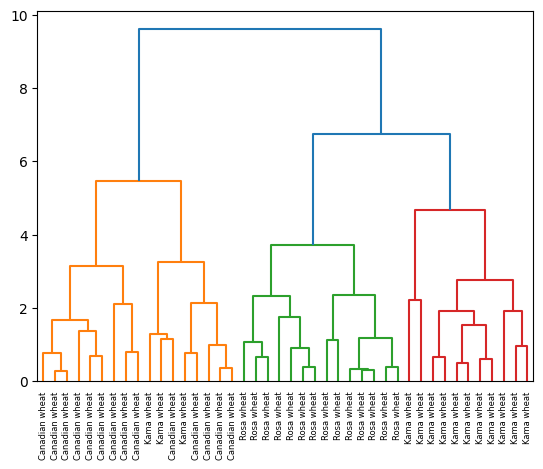

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

wheat_samples = np.loadtxt('./data/wheat_samples.txt', delimiter=',')
wheat_samples_varieties = np.loadtxt('./data/wheat_sample_varieties.txt', dtype='str', delimiter=',')

# Calculate the linkage: mergings
wheat_mergings = linkage(wheat_samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(wheat_mergings,
           labels=wheat_samples_varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## Hierarchies of stocks

Earlier, we used k-means clustering to cluster companies according to their stock price movements. Now, we'll perform hierarchical clustering of the companies. With our NumPy array of price movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so we'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.

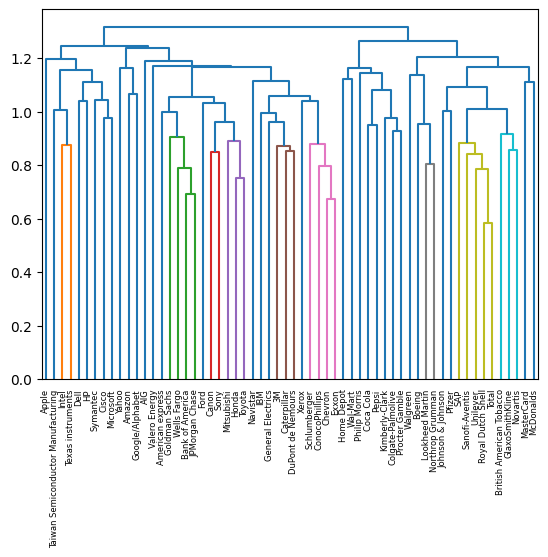

In [21]:
# use normalize (instead of Normalize like last time)
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

## Different linkage, different hierarchical clustering! Eurovision revisited

In this section, we'll explore hierarchical clustering of the voting countries at the Eurovision song contest using 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

Because the data could not be obtained from the references provided, it was extracted from the exercise into files which are read in the next cell.

In [22]:
euro_samples = np.loadtxt('./data/eurovision_2016_samples.txt', delimiter=',')
euro_country_names = np.loadtxt('./data/eurovision_2016_country_names.txt', dtype='str', delimiter=',')
print(euro_samples)
print(euro_country_names)

[[ 2. 12.  0. ...  0.  6.  0.]
 [12.  0.  4. ...  0. 10.  0.]
 [ 0. 12.  3. ...  0.  8.  4.]
 ...
 [ 8.  5.  6. ... 12.  7.  0.]
 [ 7.  4.  0. ...  0. 12.  0.]
 [ 0.  6.  0. ...  0.  5. 12.]]
['Albania' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Belarus'
 'Belgium' 'Bosnia & Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'F.Y.R. Macedonia' 'Finland'
 'France' 'Georgia' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Latvia' 'Lithuania' 'Malta' 'Moldova' 'Montenegro'
 'Norway' 'Poland' 'Russia' 'San Marino' 'Serbia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'The Netherlands' 'Ukraine' "United Kingdom'"]


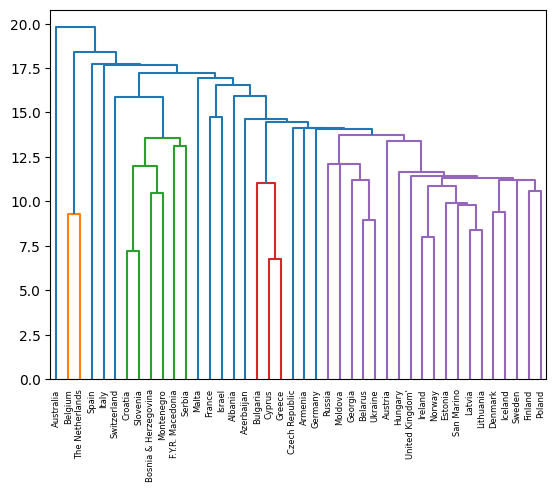

In [23]:
# necessary imports were done in earlier cells above
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(euro_samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=euro_country_names,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

## Extracting the cluster labels

From the dendrogram in the ***Hierarchical clustering of the grain data*** section, we can see that the intermediate clustering of the grain samples at height 6 is 3 clusters. Here, we'll use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

We'll use  the objects already built in cell 20 above.

In [24]:
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(wheat_mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': wheat_samples_varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'], )

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


## t-SNE in sklearn

+  t-SNE = "t-distributed stochastic neighbor embedding"
+  Maps samples to 2D space (or 3D)
+  Map approximately preserves nearness of samples

### t-SNE on Iris data set

In [25]:
df_iris = pd.read_csv('./data/iris.data', header=None)
df_iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
print(df_iris['class'].value_counts())
df_iris.head()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
iris_features = df_iris.iloc[:, :-1]
iris_labels = list(df_iris.iloc[:, -1])
species = [2 if x == "Iris-virginica" else
           1 if x == "Iris-versicolor" else
           0 for x in iris_labels]

# species = iris_labels.replace({"Iris-setosa": 0,
#                                "Iris-versicolor": 1,
#                                "Iris-virginica": 2})

samples = iris_features.values
print(samples[:5, :])
print(species[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0, 0, 0, 0, 0]


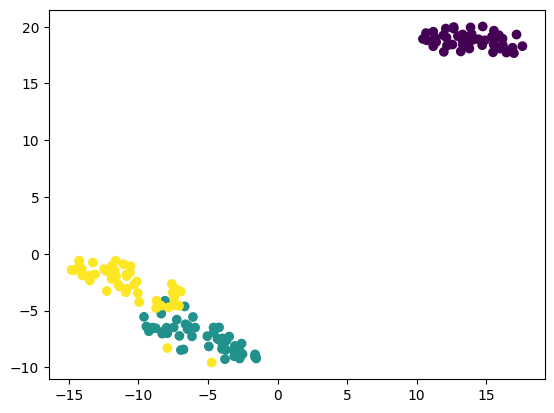

In [27]:
from sklearn.manifold import TSNE 
model = TSNE(learning_rate=100)  
transformed = model.fit_transform(samples) 
xs = transformed[:,0] 
ys = transformed[:,1] 
plt.scatter(xs, ys, c=species) 
plt.show() 

## A t-SNE map of the stock market

t-SNE can provide great visualizations when the individual samples can be labeled. Here, we'll apply t-SNE to the company stock price data we worked with earlier. A scatter plot of the resulting t-SNE features, labeled by the company names, will give us a map of the stock market.

In [28]:
normalized_movements = np.loadtxt('./data/normalized_movements.txt')
print(normalized_movements.shape)
normalized_movements

(60, 963)


array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

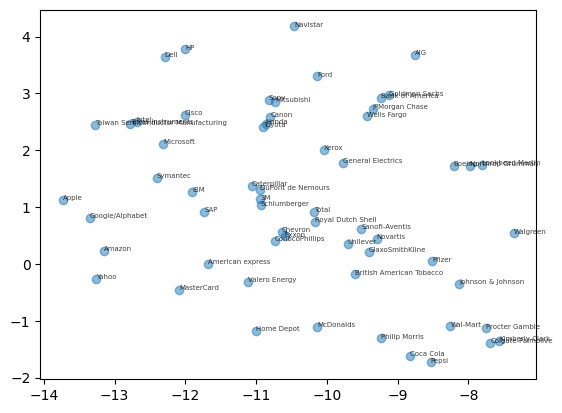

In [29]:
model = TSNE(learning_rate=50)

# apply fit_transform to normalized_movements
tsne_features = model.fit_transform(normalized_movements)

# select the 0th feature
xs = tsne_features[:, 0]

# select the 1th feature
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

## PCA - Correlated data in nature

We are given an array grains giving the width and length of samples of grain and suspect that width and length will be correlated. To confirm this, we'll make a scatter plot of width vs length and measure their Pearson correlation.

In [30]:
grains = np.loadtxt('./data/grain_widths_lengths.csv', delimiter=',')
grains.shape

(210, 2)

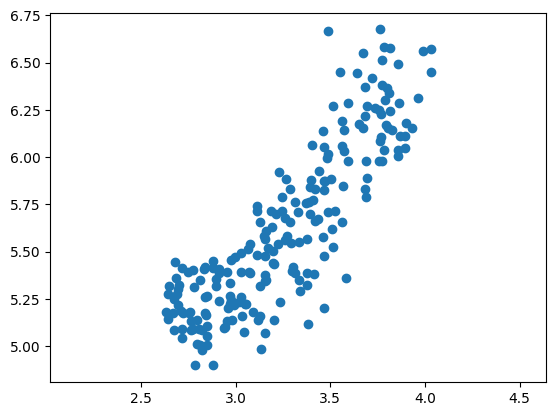

Pearson correlation BEFORE PCA transformation: 0.8604149377143466


In [31]:
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(f"Pearson correlation BEFORE PCA transformation: {correlation}")

## Decorrelating the grain measurements with PCA

We just observed that the width and length measurements of the grain are correlated. Now, we'll use PCA to decorrelate these measurements, plot the decorrelated points and measure their Pearson correlation.

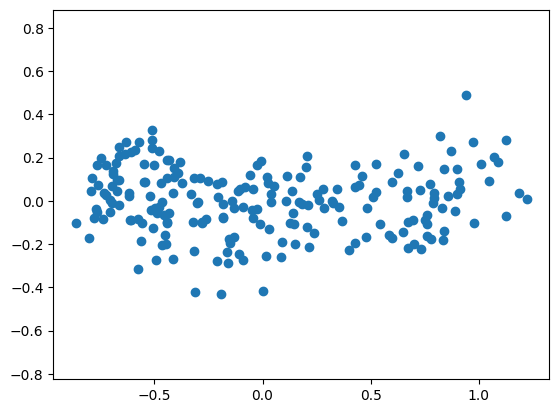

Pearson correlation AFTER PCA transformation: -7.806255641895632e-17


In [32]:
from sklearn.decomposition import PCA

# create PCA instance
model = PCA()

# apply the fit_transform method of model to grains
pca_features = model.fit_transform(grains)

# assign 0th column of pca_features
xs = pca_features[:,0]

# assign 1st column of pca_features
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)
# display the correlation
print(f"Pearson correlation AFTER PCA transformation: {correlation}")

## The first principal component

The first principal component of the data is the direction in which the data varies the most. Here, we'll use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

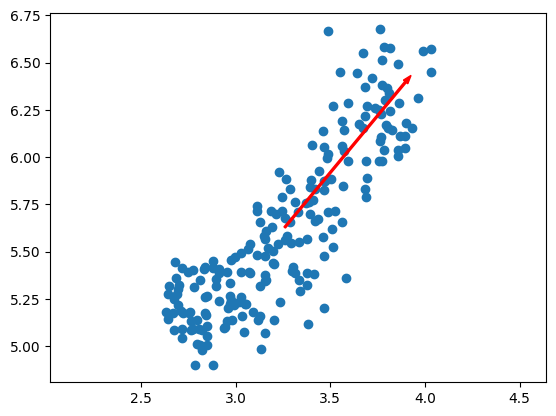

[3.25860476 5.62853333]


In [33]:
# grains.shape  # (210, 2)

# scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# PCA instance
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

print(mean)

## Variance of the PCA features

The fish dataset is 6-dimensional, but what is its intrinsic dimension? We can plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [34]:
fish_species.unique()

array(['Bream', 'Roach', 'Smelt', 'Pike'], dtype=object)

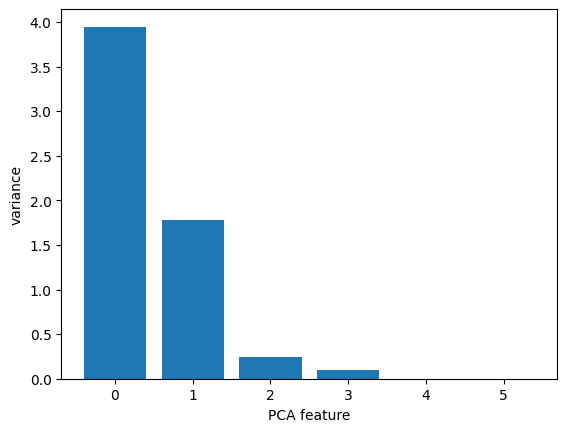

In [35]:
# create scaler (applied to each feature)
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to samples
pipeline.fit(fish_samples)  # fish_samples.shape = (85, 6)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## Manually reducing dimensions from 6 to 2

In [36]:
# rescale the data
scaler = StandardScaler()
scaler.fit(fish_samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_samples = scaler.transform(fish_samples)
scaled_samples[:5, :]

array([[-0.50109735, -0.36878558, -0.34323399, -0.23781518,  1.0032125 ,
         0.25373964],
       [-0.37434344, -0.29750241, -0.26893461, -0.14634781,  1.15869615,
         0.44376493],
       [-0.24230812, -0.30641281, -0.25242364, -0.15397009,  1.13926069,
         1.0613471 ],
       [-0.18157187, -0.09256329, -0.04603648,  0.02896467,  0.96434159,
         0.20623332],
       [-0.00464454, -0.0747425 , -0.04603648,  0.06707608,  0.8282934 ,
         1.0613471 ]])

In [37]:
# Create a PCA model with 2 components
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


## A tf-idf word-frequency array

In this section we'll create a tf-idf word frequency array for a toy collection of documents. We'll use the `TfidfVectorizer` from `sklearn`. It transforms a list of documents into a word frequency array, which it outputs as a `csr_matrix` (Compressed Sparse Row matrix). It has `fit()` and `transform()` methods like other sklearn objects.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Create a TfidfVectorizer
tfidf = TfidfVectorizer()

# Apply fit_transform to document
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


## Clustering Wikipedia

`TruncatedSVD` is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. We can combine our knowledge of `TruncatedSVD` and `k-means` to cluster some popular pages from Wikipedia. Here, we'll build the pipeline and then apply it to the word-frequency array of some Wikipedia articles.

We'll create a Pipeline object consisting of a TruncatedSVD followed by KMeans and then use it on the word-frequency matrix for our set of articles.

The Wikipedia dataset we will be working with was obtained from [here](https://www.lateral.io/resources-blog/the-unknown-perils-of-mining-wikipedia).

In [39]:
titles = []
with open('./data/Wikipedia articles/wikipedia_60_titles.txt', mode='r') as file:
    lines = file.readlines()
    for line in lines:
        titles.append(line.strip())

n_columns = len(titles)
print(n_columns)
print(titles[:5])

60
['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie', 'Google Search']


In [40]:
from scipy.sparse import csr_matrix

# read preprocessed tf-idf word-frequencies
wiki_word_vecs = np.loadtxt('./data/Wikipedia articles/wikipedia-vectors.csv', delimiter=',', skiprows=1, usecols=np.arange(1,n_columns+1))
# titles are columns, need to make these rows
wiki_word_vecs = np.transpose(wiki_word_vecs)

# convert to csr matrix
articles = csr_matrix(wiki_word_vecs)
print(f"wiki_word_vecs.shape = {wiki_word_vecs.shape} | articles.shape = {articles.shape}")
# print(wiki_word_vecs[:5, :5])
# print(article)  # looks right

wiki_word_vecs.shape = (60, 13125) | articles.shape = (60, 13125)


In [41]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [42]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label - results will differ in successive runs
print(df.sort_values(['label']))

    label                                        article
29      0                               Jennifer Aniston
26      0                                     Mila Kunis
25      0                                  Russell Crowe
24      0                                   Jessica Biel
23      0                           Catherine Zeta-Jones
22      0                              Denzel Washington
21      0                             Michael Fassbender
20      0                                 Angelina Jolie
27      0                                 Dakota Fanning
28      0                                  Anne Hathaway
38      1                                         Neymar
39      1                                 Franck RibÃ©ry
30      1                  France national football team
31      1                              Cristiano Ronaldo
32      1                                   Arsenal F.C.
34      1                            Zlatan IbrahimoviÄ‡
35      1                Colomb

## NMF applied to Wikipedia articles

Here, we'll apply **NMF** (Non-negative matrix factorization) using the **tf-idf word-frequency array** of Wikipedia articles, given as a **csr matrix** articles. We'll fit the model and transform the articles the explore the results

In [43]:
from sklearn.decomposition import NMF

# Create an NMF instance
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0.01 0.01]
 [0.   0.4

In [44]:
# Create a pandas DataFrame
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003815
1    0.000000
2    0.000000
3    0.571934
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419613
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


## NMF learns topics of documents

When NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. We can verify this for ourselves for the NMF model that was built earlier using the Wikipedia articles. Previously, we saw that the 4th NMF feature (index = 3) value was high for the articles about actors Anne Hathaway and Denzel Washington. Here we'll identify the topic of the corresponding NMF component.


In [45]:
with open('./data/words.txt', mode='r') as file:
    lines = file.readlines()
words = []
for line in lines:
    words.append(line.strip())

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())  # notice the topics (1st col)

(6, 13125)
film       0.632030
award      0.254804
starred    0.246907
role       0.212850
actress    0.187630
Name: 3, dtype: float64


## Explore the LED digits dataset

Now we'll use NMF to decompose grayscale images into their commonly occurring patterns. First, we'll explore the image dataset and see how it is encoded as an array. We are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in our dataset are pictures of a LED digital display.

In [46]:
image_samples = np.loadtxt('./data/lcd-digits.csv', delimiter=',')
image_samples.shape

(100, 104)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


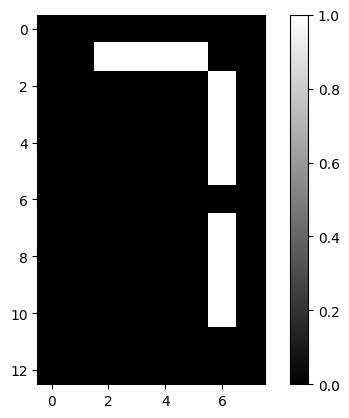

In [47]:
# Select the 0th row: digit
digit = image_samples[0, :]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

## NMF learns the parts of images

Now we'll use NMF to decompose the digits dataset. We have the digit images as a 2D array samples. We'll `show_as_image()` function in the next cell to display the images encoded as 1D arrays:

In [48]:
def show_as_image(sample):
    """ Displays image (sample) encoded as a 1D array
    
    """
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

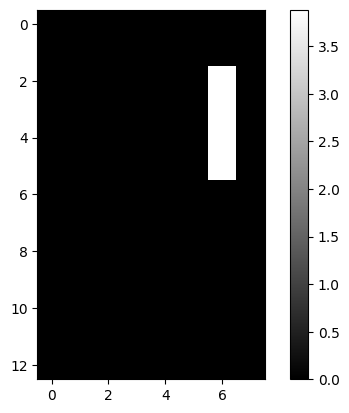

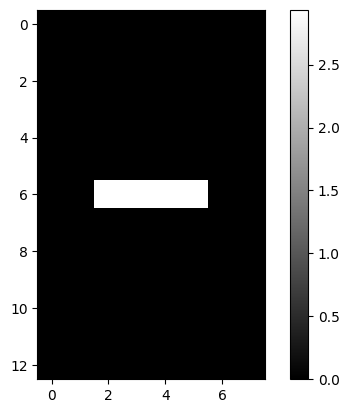

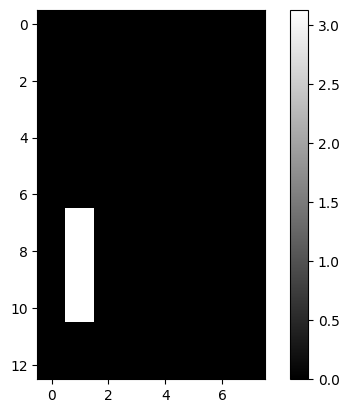

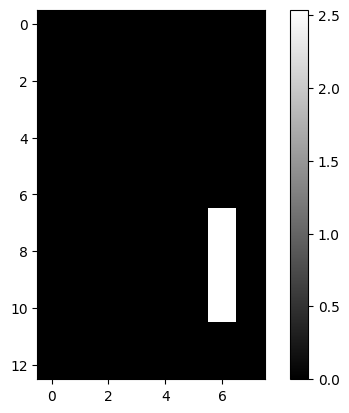

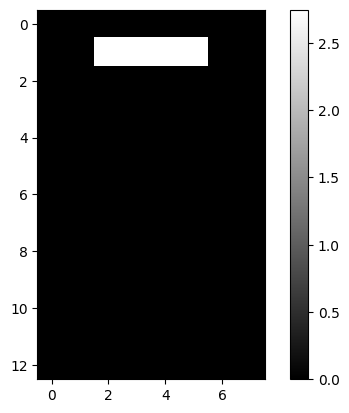

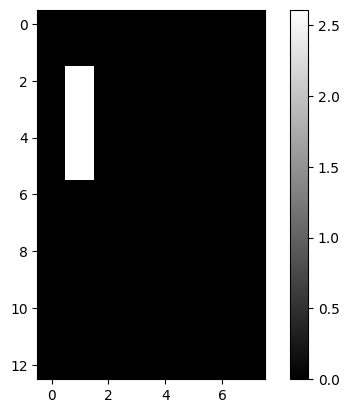

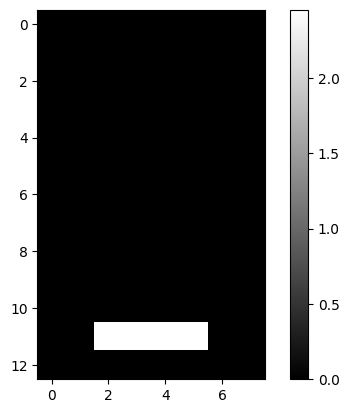

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51281573e-14]


In [49]:
# Create an NMF model
model = NMF(n_components=7)

# Apply fit_transform to samples
features = model.fit_transform(image_samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features
digit_features = features[0, :]

# Print digit_features
print(digit_features)